In [19]:
from __future__ import annotations

from typing import List

from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from oop_functions.analytics_util import AnalyticsUtil, DecisionTreeAnalyticsUtil
from oop_functions.experiment_helper import ExperimentDataHelper1
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *


In [20]:
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)
missing_df = pd.read_csv('./missing_features/combined_missing.csv', index_col=0)

In [21]:
year = 1
label = f'cancer_in_next_{year}_years'
source_df = processed_data
source_df = resample_class(source_df, label, 0, 30000)

In [22]:
classifier = DecisionTreeClassifier(criterion= 'entropy')
experiment_data_helper = ExperimentDataHelper1(source_df, label, ['cancer_'])
data_util_lambdas = experiment_data_helper.train_test_split_util.split_kfold(5)
data_util = data_util_lambdas[0]()

In [23]:
analytics_util = DecisionTreeAnalyticsUtil(classifier, data_util).fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


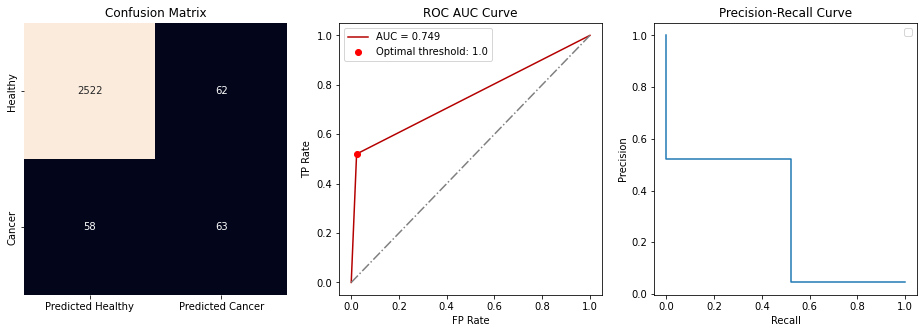

In [24]:
analytics_util.get_report_generation_util().display_graph()

In [25]:
analytics_util.plot_save_tree(plot_tree=False)

In [26]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
# TODO: finish this one
differentiate_confusion_matrix_over = {
    'was_screened': [
        ([0], lambda df: isin_filter(df, 'was_screened', [0])), 
        ([1], lambda df: isin_filter(df, 'was_screened', [1]))
    ], 
    'ovar_histtype': [[2], [2, 4, 6, 8, 9, 31]]
}

In [27]:
experiment_runner = ExperimentRunner(classifier, experiment_data_helper, missing_df, test_n_folds=3)
cv_analytics_util = experiment_runner.run_experiment()

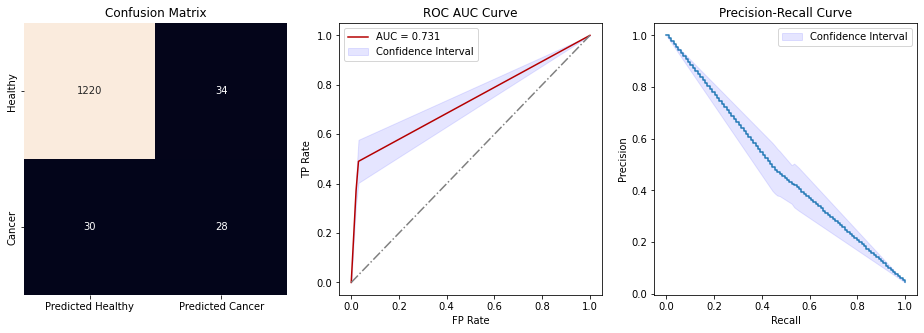

In [28]:
cv_analytics_util.display_graph()

In [29]:
cv_analytics_util.get_cv_feature_selection()

,column_name,count,mean,percent_missing_before_propagation,percent_missing_after_propagation
0,ca125_result,3.0,0.372008,77.080965,49.194056
1,ph_any_muq,3.0,0.077569,58.802841,58.802841
2,ca125ii_level,3.0,0.060025,77.143352,77.143352
3,ph_any_sqx,3.0,0.029656,28.641622,28.641622
4,age,3.0,0.026445,0.000000,0.000000
...,...,...,...,...,...
133,stroke_f,1.0,0.000192,2.858106,2.858106
134,in_TGWAS_population,1.0,0.000182,0.000000,0.000000
135,numcyst,1.0,0.000157,77.080965,49.194056
136,visl,1.0,0.000067,77.080965,49.194056


In [30]:
import warnings
warnings.filterwarnings("ignore")


In [33]:
cv_analytics_util.analytics_utils[0].get_high_confidence_errors()

[(         age  agelevel  arthrit_f  asp  asppd  bbd  bcontr_f  bcontra  \
  467164  65.0       0.0        1.0  0.0    0.0  1.0       1.0      1.0   
  
          bcontrt  benign_ovcyst  ...  visr     volum  was_screened  weight20_f  \
  467164      4.0            0.0  ...     0  8.203125           1.0       145.0   
  
          weight50_f  weight_f  cancer_in_next_1_years  \
  467164       155.0     165.0                     1.0   
  
          cancer_in_next_1_years_pred  cancer_in_next_1_years_prob  distance  
  467164                          0.0                          0.0         0  
  
  [1 rows x 167 columns],
           age  agelevel  arthrit_f  asp  asppd  bbd  bcontr_f   bcontra  \
  397624  70.0       2.0        1.0  0.0    0.0  0.0       0.0  1.478516   
  397627  80.0       2.0        1.0  0.0    0.0  0.0       0.0  1.478516   
  354875  70.0       1.0        0.0  0.0    0.0  1.0       1.0  1.000000   
  354877  75.0       1.0        0.0  0.0    0.0  1.0       1.0  1.00